In [173]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# for full set of styles:
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

## Customizing major/minor ticks

### Removing ticks/labels/gridlines

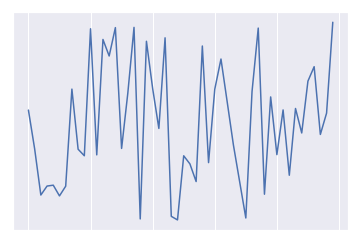

In [169]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator()) # Removes y ticks + labels and gridlines
ax.xaxis.set_major_formatter(plt.NullFormatter()) # Removes x labels 

# Having no ticks at all can be useful in many situations—for example, 
# when you want to show a grid of images.

### Specifying amount of ticks per axis

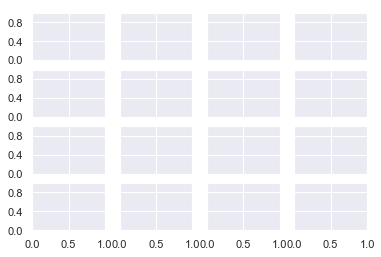

In [170]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(2))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

### Custom non-numerical ticks using LaTex

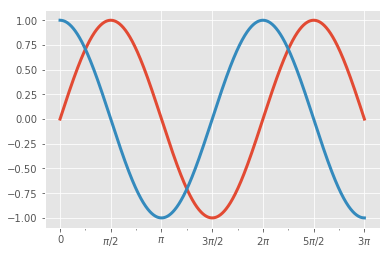

In [162]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)


ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

## Everything + label + legend

### Splitting legend locations

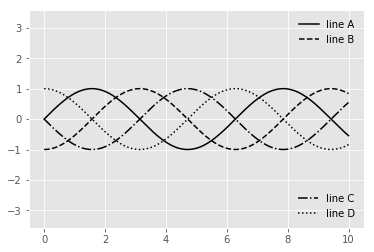

In [53]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
    styles[i], color='black')
    ax.axis('equal')
    
# specify the lines and labels of the first legend
    ax.legend(lines[:2], ['line A', 'line B'],
    loc='upper right', frameon=False)
    
# Create the second legend and add the artist manually.
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line D'],
loc='lower right', frameon=False)
ax.add_artist(leg)

### object-oriented method

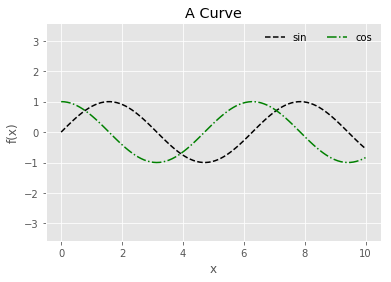

In [51]:
ax = plt.axes()
title='A Simple Plot'
ax.plot(x, np.sin(x), color='k', linestyle='--', label='sin')
ax.plot(x, np.cos(x), color='g', linestyle='-.', label='cos')
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("A Curve")
ax.axis('equal')
# ax.set(xlim=(0, 10), ylim=(-2, 2))
ax.legend(loc='best', frameon=False, ncol=2)
# Choose a specific legnd to display
# ax.legend(['sin'],loc='best')

## Different color specifications

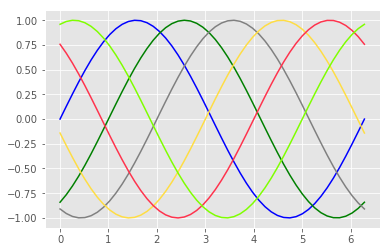

In [23]:
plt.plot(x, np.sin(x - 0), color='blue')  # specify color by name
plt.plot(x, np.sin(x - 1), color='g')  # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.5')  # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')  # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3))  # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse')
# all HTML color names supported

# If no color is specified, Matplotlib will automatically cycle through a set of default
# colors for multiple lines.

# Scatter plots

## plt.scatter method - control size of each point

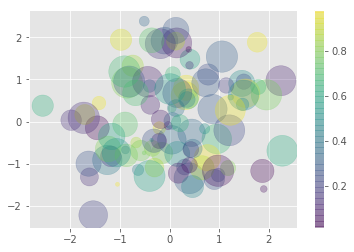

In [27]:
# The primary difference of plt.scatter from plt.plot is that it can be used to create
# scatter plots where the properties of each individual point (size, face color, edge color,
# etc.) can be individually controlled or mapped to data.

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
cmap='viridis')
plt.colorbar()

# scatter plot has given us the ability to simultaneously explore
# four different dimensions of the data: the (x, y) location of each point corresponds to
# the sepal length and width, the size of the point is related to the petal width, and the
# color is related to the particular species of flower.

# plt.plot can be
# noticeably more efficient than plt.scatter. The reason is that plt.scatter has the
# capability to render a different size and/or color for each point, so the renderer must
# do the extra work of constructing each point individually.


# Use area, not radius to scale the size

# Contour plots

## What are contour plots?

Contour plots (sometimes called Level Plots) are a way to show a three-dimensional surface on 
a two-dimensional plane. It graphs two predictor variables X Y on the y-axis and a response variable Z as contours.

## Where are contour plots used?

Contour lines commonly show altitude (like height of a geographical features), but they can also be used to show density, brightness, or electric potential.

## Creating contour plots

In [29]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [30]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
# https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
Z = f(X, Y)
print(X)

[[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 ...
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]]


### Basic line contour plot

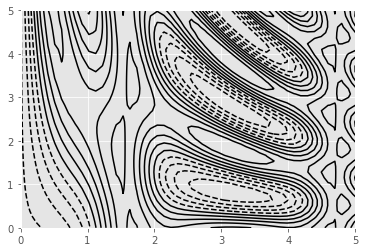

In [31]:
plt.contour(X, Y, Z, 10,colors='black')
# It takes three arguments:
# a grid of x values, a grid of y values, and a grid of z values.
# The number is the number of equally spaced lines 

### Fancy contour plot

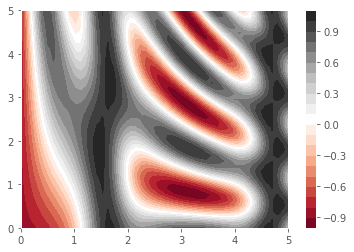

In [32]:

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar() # Adds the color scale at the side
# For full list of cmaps:
# plt.cm.<TAB>


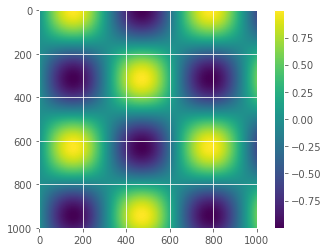

In [65]:
# being able to choose a colormap is just the first step: 
# more important is how to decide among the possibilities

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar()

plt.imshow(I)

### Image plots

### Combining line contour plot with image plot

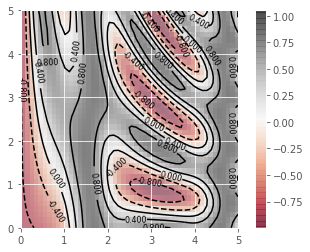

In [153]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
# Note the label code
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5) #Note transparency parameter of image plot
plt.colorbar()

# Histogram plots

(array([  4.,  24.,  74., 156., 270., 254., 147.,  56.,  13.,   2.]),
 array([-3.3448242 , -2.6583429 , -1.97186161, -1.28538031, -0.59889901,
         0.08758229,  0.77406359,  1.46054489,  2.14702619,  2.83350749,
         3.51998879]),
 <a list of 10 Patch objects>)

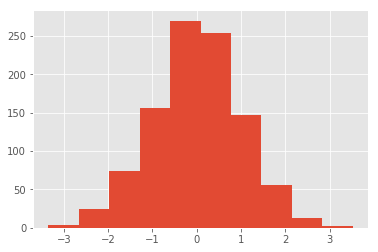

In [35]:
data = np.random.randn(1000)
plt.hist(data)

## Parameters to play with

D:\Anaconda\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00437011, 0.        , 0.01311034, 0.02185056, 0.03496089,
        0.04807123, 0.06992179, 0.10488268, 0.1485838 , 0.18354469,
        0.2228757 , 0.27531704, 0.42390084, 0.35834916, 0.39768017,
        0.37582961, 0.35834916, 0.37582961, 0.29279749, 0.20102514,
        0.1485838 , 0.11799302, 0.08740224, 0.03933101, 0.02622067,
        0.03059078, 0.        , 0.00437011, 0.        , 0.00437011]),
 array([-3.3448242 , -3.1159971 , -2.88717   , -2.6583429 , -2.4295158 ,
        -2.20068871, -1.97186161, -1.74303451, -1.51420741, -1.28538031,
        -1.05655321, -0.82772611, -0.59889901, -0.37007191, -0.14124481,
         0.08758229,  0.31640939,  0.54523649,  0.77406359,  1.00289069,
         1.23171779,  1.46054489,  1.68937199,  1.91819909,  2.14702619,
         2.37585329,  2.60468039,  2.83350749,  3.06233459,  3.29116169,
         3.51998879]),
 <a list of 1 Patch objects>)

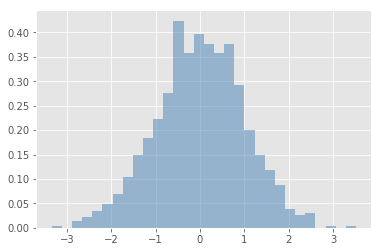

In [36]:
plt.hist(data,
         bins=30,
         normed=True,
         alpha=0.5,
         histtype='stepfilled',
         color='steelblue',
         edgecolor='none')

## Assigning fixed parameters to different sets of data on same plot

(array([0.00307053, 0.00307053, 0.00307053, 0.        , 0.00307053,
        0.01228214, 0.01228214, 0.0184232 , 0.02763481, 0.03991694,
        0.03684641, 0.05219908, 0.08904549, 0.10132762, 0.08597495,
        0.11975083, 0.15659723, 0.1535267 , 0.13203296, 0.21800791,
        0.20879631, 0.16580884, 0.18423204, 0.19344364, 0.11975083,
        0.18730257, 0.15045617, 0.14738563, 0.11053922, 0.08290442,
        0.05219908, 0.06141068, 0.04605801, 0.02763481, 0.02763481,
        0.01535267, 0.00614107, 0.        , 0.0092116 , 0.00614107]),
 array([-3.93461122, -3.60893497, -3.28325872, -2.95758247, -2.63190622,
        -2.30622997, -1.98055372, -1.65487747, -1.32920122, -1.00352497,
        -0.67784872, -0.35217247, -0.02649622,  0.29918003,  0.62485628,
         0.95053253,  1.27620878,  1.60188503,  1.92756128,  2.25323753,
         2.57891378,  2.90459003,  3.23026628,  3.55594253,  3.88161878,
         4.20729503,  4.53297128,  4.85864753,  5.18432378,  5.51000003,
         5.83567

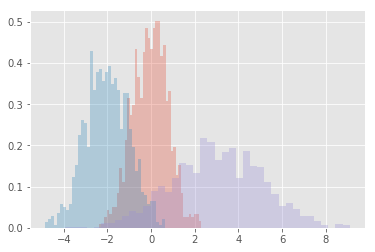

In [37]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

# For more info:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

## Count number of points in histogram bin

In [38]:
counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 28, 230, 524, 203,  15], dtype=int64)

# Subplotting basics

## plt method

In [117]:
x = np.linspace(0,2*np.pi,num=50,endpoint=True)
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1,)  # (rows, columns, panel number)
plt.subplots_adjust(hspace=0.4, wspace=0.4) 
## specify the spacing along the height and width of the figure, in units of the subplot size
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

TypeError: cannot create weak reference to 'bool' object

<Figure size 432x288 with 0 Axes>

In [118]:
plt.subplot?

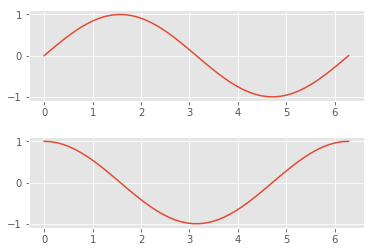

In [88]:
# loop method

x = np.linspace(0,2*np.pi,num=50,endpoint=True)
plt.figure()  # create a plot figure
no_of_plots = 2

for i in range(1, no_of_plots+1):
    plt.subplot(2, 1, i)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    if i == 1:
        plt.plot(x, np.sin(x))
    if i == 2:
        plt.plot(x, np.cos(x))

## Object-oriented method

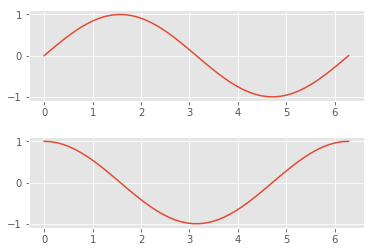

In [107]:
x = np.linspace(0,2*np.pi,num=50,endpoint=True)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 1, 1)
ax.plot(x, np.sin(x))

ax = fig.add_subplot(2, 1, 2)
ax.plot(x, np.cos(x))


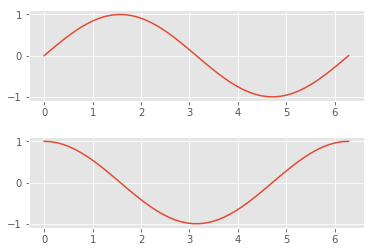

In [96]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    if i == 1:
        ax.plot(x, np.sin(x))
    if i == 2:
        ax.plot(x, np.cos(x))

# Annotating points of interest on graph

In [123]:
births = pd.read_csv('births.csv')
births.dropna(axis=0)
births.isnull().values.any() #Check that df has no null values

True

In [124]:
quartiles = np.percentile(births['births'], [25, 50, 75])
# Returns a list of numbers

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births.index = pd.to_datetime(10000 * births.year + 100 * births.month +
                              births.day,
                              format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [
    pd.datetime(2012, month, day) for (month, day) in births_by_date.index
]

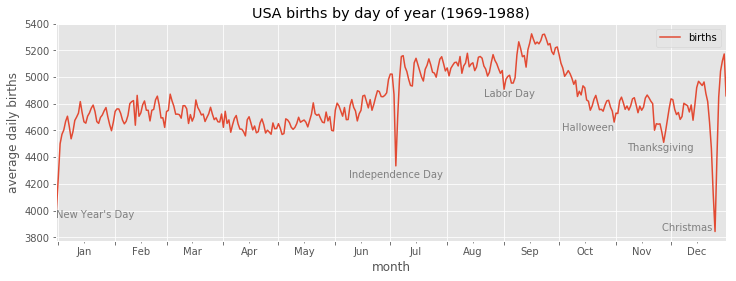

In [127]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# # Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births',xlabel='month')
# # Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

## Annotating with precise location of text

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

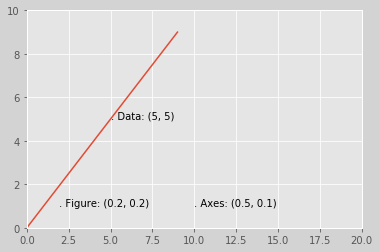

In [142]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 20, 0, 10])

x = np.arange(0,10,1)
y = x
ax.plot(x,y)

ax.text(5, 5, ". Data: (5, 5)", transform=ax.transData) # used the most
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure) # not that important

## Annotating with arrows

Text(10, 4, 'local maximum')

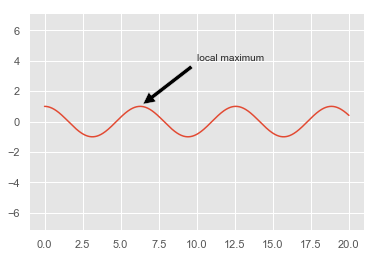

In [178]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum',
            xy=(6.28, 1),
            xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))